<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Customer-churn-prediction-model" data-toc-modified-id="Customer-churn-prediction-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Customer churn prediction model</a></span></li><li><span><a href="#Client-clustering" data-toc-modified-id="Client-clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Client clustering</a></span></li><li><span><a href="#Conclusion-and-recomendations" data-toc-modified-id="Conclusion-and-recomendations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion and recomendations</a></span></li></ul></div>

## Exploratory data analysis

In [1]:
# import libraries

import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import itertools
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# upload data
df = pd.read_csv('/datasets/gym_churn.csv')

# function for the preliminary dataset analysis

def analyze (dataset):
    dataset.columns = [x.lower().replace(' ', '_') for x in dataset.columns.values]
    dataset.info()
    display('*'*50)
    display(dataset.describe())
    display('*'*50)
    display(dataset.head())
    display('*'*50)
    display('Number of duplicates', dataset.duplicated().sum())

analyze(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

'**************************************************'

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


'**************************************************'

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


'**************************************************'

'Number of duplicates'

0

We have a big enough dataset at our disposal, in which there are no duplicates and missed values. Some of the features in the dataset are in Boolean format. The average age of the club's client is 29 years, the maximum is 41. At least half of the subscriptions are for a month, approximately 25% - for a period of six months. On average, customers visit the club less than 2 times a week, a maximum of 6 times a week. According to gender mix, clients are divided roughly in half. Strong variability for the indicator of total revenue from other services of the fitness center is a standard deviation of 96 units, while the average value is 146 units.

Let's look at the average values of the signs in two groups: those who went into the outflow and those who stayed.

In [2]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Those who leave, on average, live or work further than those who stay. It seems that the presence of friends or colleagues in the club also has a positive effect on the term of subscription. The duration of contract is significantly longer for the remaining customers - probably those who are not sure initially prefer to buy a shorter-term option. The average age of those who stayed is 3 years higher compared to those who left: perhaps older people understand the increasing importance of physical exercise coming with age. Lifetime shows that if customers fall off, it happens in a month, and active customers use a subscription for about 5 months. Expectedly retentioned customers acquire more additional services and more often go to group classes.

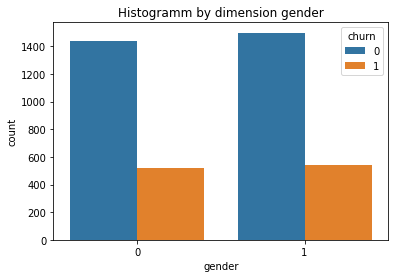

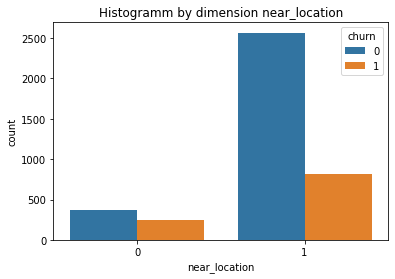

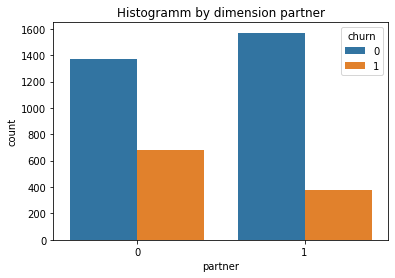

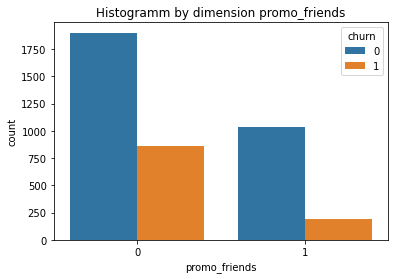

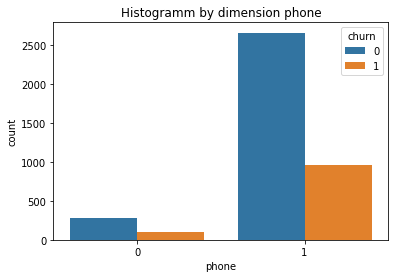

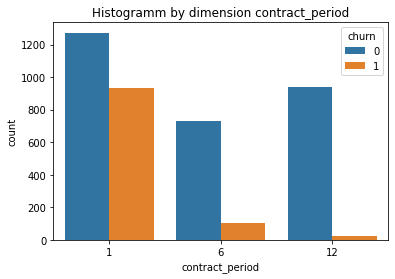

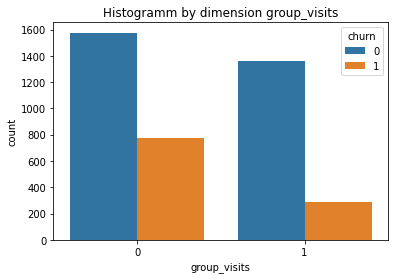

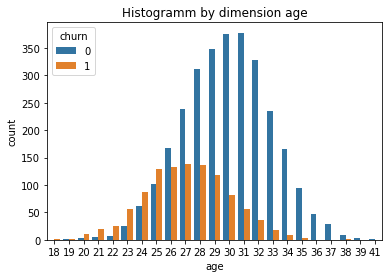

In [3]:
for column in ['gender','near_location', 'partner', 'promo_friends', 'phone', 
               'contract_period', 'group_visits', 'age']:
    
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title('Histogramm by dimension ' + column)
    plt.show()

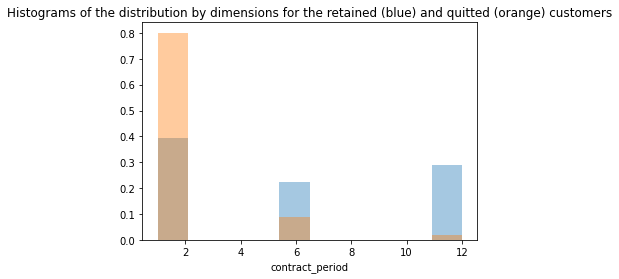

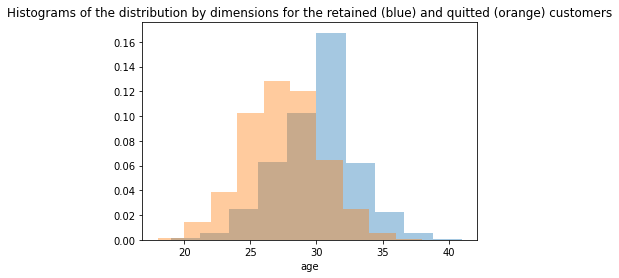

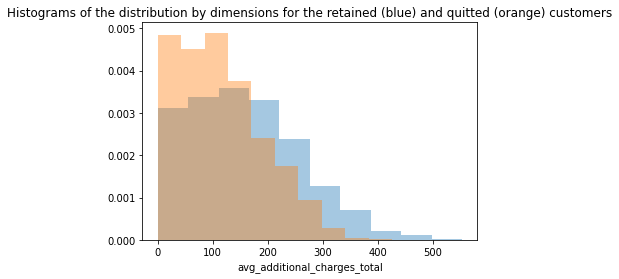

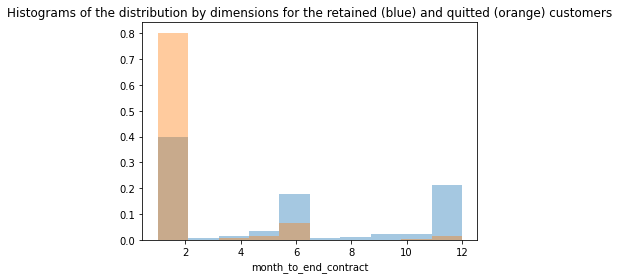

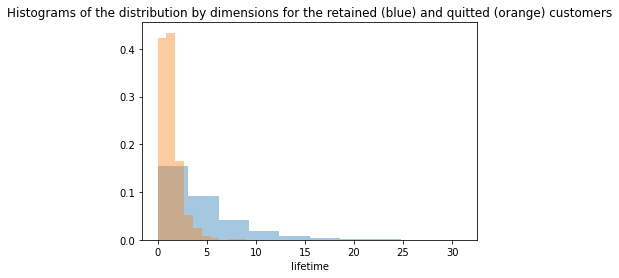

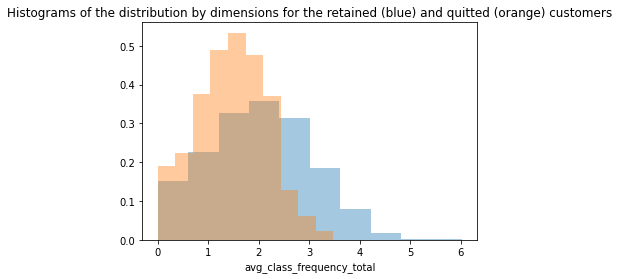

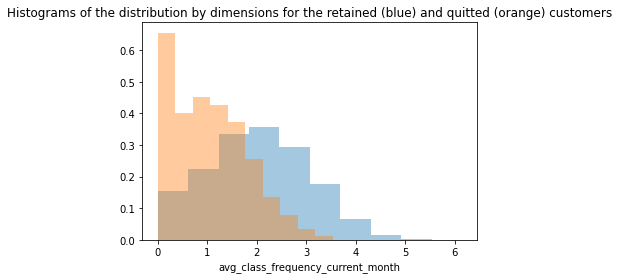

In [4]:
binary_feature = []
non_binary_feature = []
for column in df.drop('churn', axis =1).columns:
    if len(df[column].unique()) <= 2:
           binary_feature.append(column)
    else:
        non_binary_feature.append(column)
 
# pair histograms
for col in non_binary_feature:
 
    sns.distplot(df.query('churn == 0')[col], label='{} = {}'.format(col, str(col)), bins = 10,  kde=False, norm_hist=True)
    sns.distplot(df.query('churn == 1')[col],label='{} = {}'.format(col, str(col)), bins = 10,  kde=False, norm_hist=True)
    plt.title('Histograms of the distribution by dimensions for the retained (blue) and quitted (orange) customers')
    plt.show()

The charts confirm the conclusions made earlier: retained customers are on average older, visit the club about 2 rubles a week and buy longer season tickets.

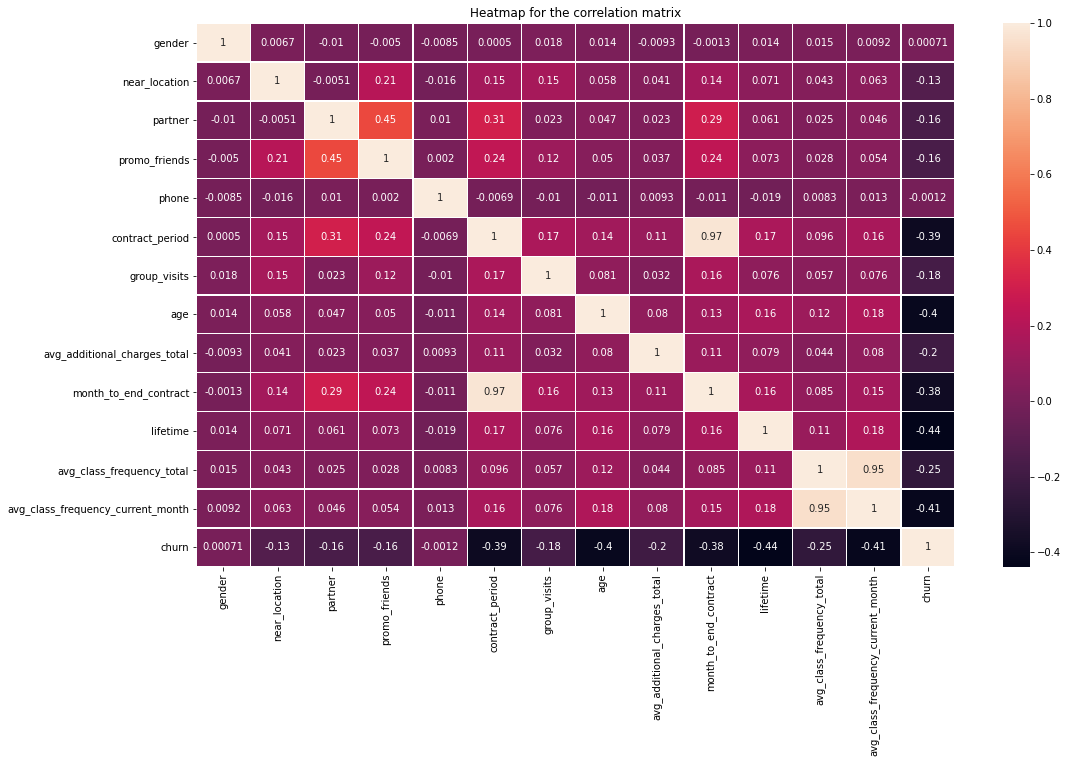

In [5]:
#creating correlation matrix
cm = df.corr() #calculating correlation matrix
fig, ax = plt.subplots(figsize=(17,10))

ax.set_ylim(
    7, 0
)

sns.heatmap(cm, annot=True, linewidths=.3) 
plt.title('Heatmap for the correlation matrix')
plt.show()

The following signs correlate quite strongly with the target variable: contract_period, age. Multicollinearity view for the following attributes: month_to_end_contract and contract period, avg_class_frequency_total and avg_class_frequency_current_month. To get rid of multicollinearity, we will remove 1 of the features in each pair.

In [6]:
df = df.drop(columns = ['month_to_end_contract', 'avg_class_frequency_total'])
df.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0


## Customer churn prediction model

We will build a model of binary classification of clients, the target feature is customer churn in the next month.

In [7]:
# save the dataframe taking into account the transformation of features
clients = pd.get_dummies(df)

# let's divide our data into features (X matrix) and target variable (y)
X = clients.drop(columns=['churn'])
y = clients['churn']

# divide the model into a training and validation sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

# create object StandardScaler class and apply to the training sample
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # train scaler and transform matrix for the training sample

# apply standardization to the feature matrix for the test sample
X_test_st = scaler.transform(X_test)

# defining list of models
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0),
]

# a function that takes a model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)
        )
    )

# a cycle that outputs metrics across a list of models
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(random_state=0)
Accuracy:0.90 Precision:0.81 Recall:0.83 
RandomForestClassifier(random_state=0)
Accuracy:0.90 Precision:0.85 Recall:0.77 


The proportions of correct answers are the same for both models. For a situation with a fitness center, the logistic regression model is more attractive, because the Recall metric is significantly higher in it.

## Client clustering

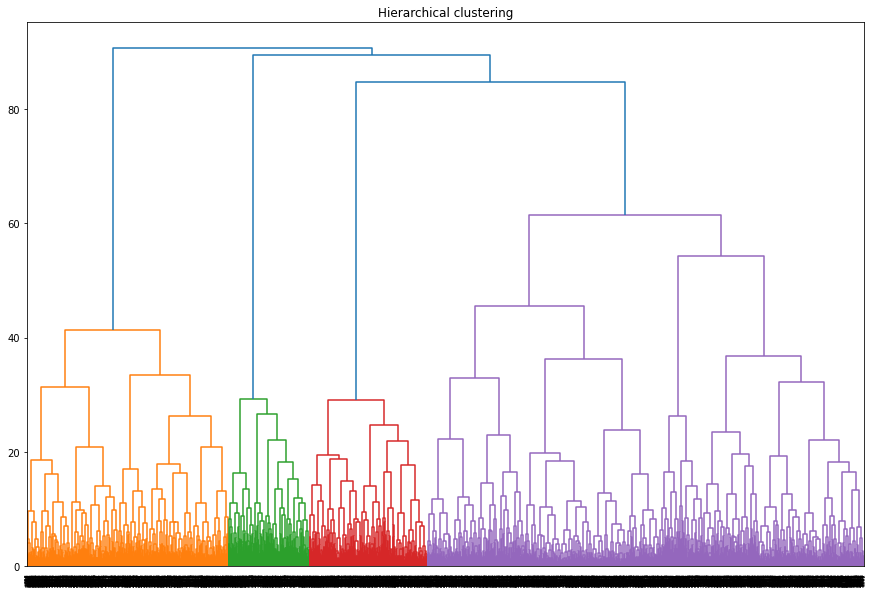

In [8]:
scaler = StandardScaler() # creating an object of the scaler class (normalizer)
df_without_churn = df.drop(columns=['churn'])
x_sc = scaler.fit_transform(df_without_churn) # train the normalizer and transform the data set

linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(15,10))
dendrogram(linked, orientation = 'top')
plt.title('Hierarchical clustering')
plt.show()

We can define 5 clusters.

In [9]:
# set the k_means model with the number of clusters 5 and fix the value of random_state
km = KMeans(n_clusters=5, random_state=0)
# predicting clusters for observations
labels = km.fit_predict(x_sc)

# save the cluster labels in the field of our dataset
df['cluster_km'] = labels

# output statistics on the average values of features for the cluster
with pd.option_context('display.float_format', '{:.2f}'.format):
        display(df.groupby('cluster_km').mean().T)

cluster_km,0,1,2,3,4
gender,0.50,0.50,0.50,0.53,0.52
near_location,1.00,0.00,1.00,1.00,0.86
partner,0.89,0.49,0.22,0.38,0.47
promo_friends,1.00,0.08,0.07,0.01,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,6.92,2.99,2.01,6.21,4.78
group_visits,0.52,0.23,0.28,0.54,0.43
age,29.61,28.68,27.58,30.70,29.30
avg_additional_charges_total,153.42,137.13,119.34,176.26,144.21
lifetime,4.28,2.97,1.92,5.42,3.94


All clusters are approximately equally distributed by gender composition. The smallest outflow rates are in clusters 0, 3, the highest are in the 1st and 2nd. The "oldest" clusters churns the least. Cluster No. 1 includes users who live in a place other than the club area.

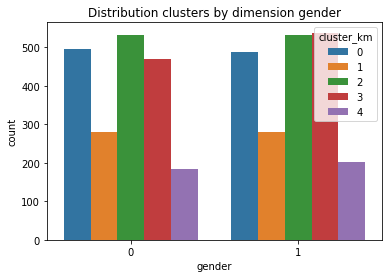

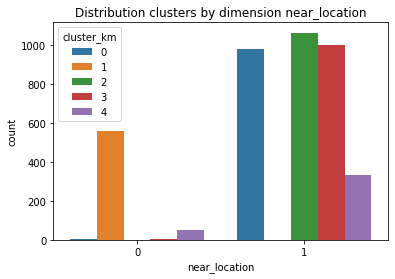

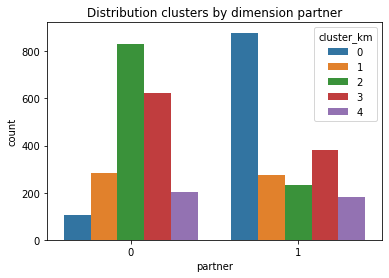

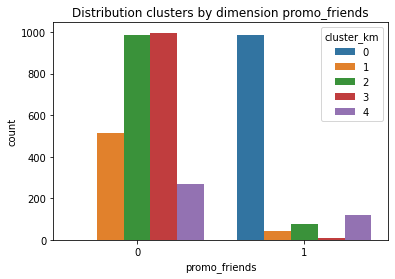

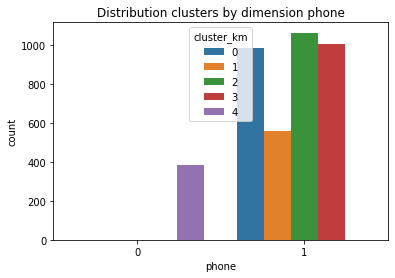

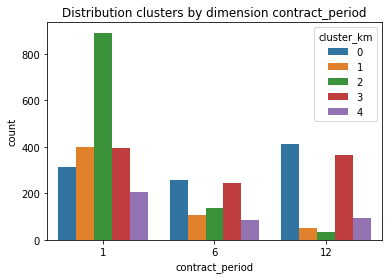

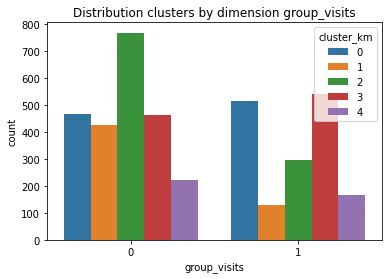

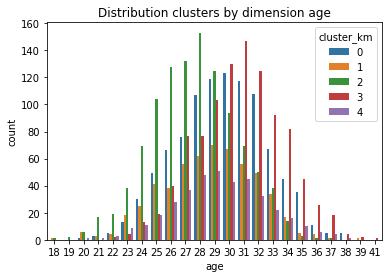

In [10]:
for column in ['gender','near_location', 'partner', 'promo_friends', 'phone', 
               'contract_period', 'group_visits', 'age']:
    
    sns.countplot(x = df[column], hue='cluster_km', data=df)
    plt.title('Distribution clusters by dimension ' + column)
    plt.show()

Let's look again at the indicators of % outflow in each cluster:

In [11]:
with pd.option_context('display.float_format', '{:.2%}'.format):
        display(df.groupby('cluster_km')['churn'].mean().T)

cluster_km
0   11.98%
1   40.32%
2   56.39%
3    1.49%
4   26.68%
Name: churn, dtype: float64

Clusters differ in the share of outflow. Clusters No. 1, 2 are prone to churn. Reliable clusters are No. 0, 3.

## Conclusion and recomendations

Based on the study results, we developed a model of customer churn and performed segmentation of customers into 5 groups.

**Signs that distinguish a "good" client from one with a high probability of outflow:**

1. Age - about 30
2. Lives or works near the club
3. Bought a subscription for six months or longer
4. Goes to group classes at least 2 times a week
5. Buys additional services in the club

**The following recommendations can be offered for the strategy of interaction with customers and their retention:**

- sales managers should primarily focus their efforts on older customers living near the club;
- promo codes from a friend bring prospective customers, it is prominent to continue to use this strategy further;
- it is advisable to conduct advertising campaigns based on the portrait of the user from clusters No. 0, 4;
- it is necessary to work with clients from "bad" clusters to stimulate their transition to the retained clusters: offer to extend the subscription, attend group classes or purchase the services of a trainer.